In [2]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import warnings
import seaborn as sns 

#Read data and skip certain rows
df = pd.read_excel('mcrnutr.xlsx', skiprows=[0,1,2,4], header=0, skipfooter=3)


/Users/abdelrahmanalqaddoumi/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
warnings.filterwarnings("ignore")

#Drop SE columns
columns_to_remove = [2, 4, 6, 8, 10,12,14,16]

df = df.drop(df.columns[columns_to_remove], axis=1)

df


,Sex and age,1988–1994,1999–2002,2003–2006,2007–2010,2009–2012,2011–2014,2013–2016,2015–2018
0,"Both sexes, age adjusted\1",49.8,50.7,48.9,49.5,49.5,48.6,47.3,46.7
1,"Both sexes, crude",49.8,50.7,48.9,49.4,49.4,48.5,47.3,46.7
2,20–44 years,49.2,51.3,49.3,50.1,49.9,48.8,47.4,46.4
3,45–64 years,49.7,49.3,47.5,48.2,48.5,47.9,46.9,46.6
4,65–74 years,51.1,50.5,49.2,49.0,49.0,48.2,47.0,46.8
...,...,...,...,...,...,...,...,...,...
70,"Female, crude",11.1,10.7,11.3,10.9,10.6,10.8,11.3,11.7
71,20–44 years,11.4,10.8,11.2,10.7,10.5,10.8,11.2,11.6
72,45–64 years,10.9,10.9,11.5,11.0,10.6,10.7,11.3,11.7
73,65–74 years,10.4,10.4,11.3,11.2,10.7,10.6,11.4,11.7


In [4]:
#Seperate Carbohydrates data
df_carbohydrates = df.iloc[:18]
df_carbohydrates
dtale.show(df_carbohydrates)

In [5]:
mean_values_carbohydrates = df_carbohydrates.mean()
mean_values_carbohydrates

1988–1994    50.344444
1999–2002    50.811111
2003–2006    49.172222
2007–2010    49.494444
2009–2012    49.527778
2011–2014    48.711111
2013–2016    47.488889
2015–2018    46.900000
dtype: float64

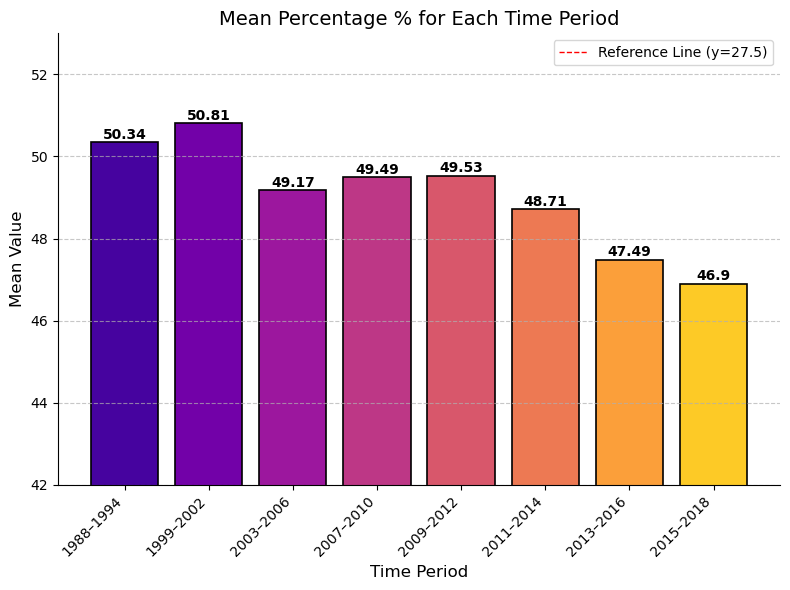

In [6]:
# color palette
sns.set_palette("plasma")

# figure and axis with a background gradient
fig, ax = plt.subplots(figsize=(8, 6))  # Light gray background

# bar plot with a gradient color
bars = plt.bar(mean_values_carbohydrates.index, mean_values_carbohydrates, edgecolor='black',
               linewidth=1.2, color=sns.color_palette("plasma", len(mean_values_carbohydrates)))

# Add data labels above each bar with a shadow effect
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{round(yval, 2)}', 
             ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Customize the plot
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.title('Mean Percentage % for Each Time Period', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a dashed grid for better readability

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis limits between 27 and 28
plt.ylim(42, 53)

# Add a horizontal line at y=27.5 for reference
plt.axhline(y=27.5, color='red', linestyle='--', linewidth=1, label='Reference Line (y=27.5)')

# Show the plot with a legend
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

In [7]:
#Seperate Protein data
df_Protein = df.iloc[19:37]
df_Protein
dtale.show(df_Protein)

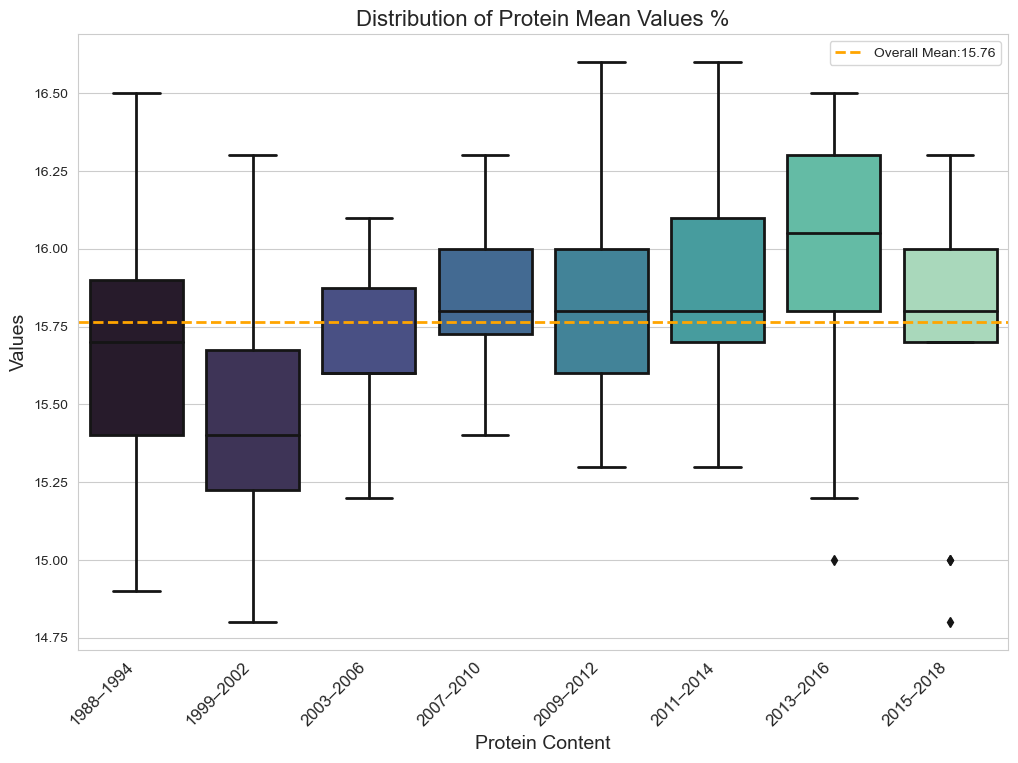

In [11]:
sns.set_palette("mako")

# Descriptive statistics boxplot with enhanced aesthetics
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# boxplot
boxplot = sns.boxplot(data=df_Protein, palette="mako", linewidth=2, fliersize=5)

# horizontal line at the mean value
mean_value = df_Protein.mean().mean()
plt.axhline(mean_value, color='orange', linestyle='dashed', linewidth=2, label=f'Overall Mean:{mean_value:.2f}')

# labels and title
plt.title('Distribution of Protein Mean Values %', fontsize=16)
plt.xlabel('Protein Content', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Customize x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [12]:
#Seperate fats data
df_fats = df.iloc[38:56]
df_fats
dtale.show(df_fats)

In [13]:
warnings.filterwarnings("ignore")

mean_values_fats = df_fats.mean()
mean_values_fats

1988–1994    33.150000
1999–2002    33.105556
2003–2006    33.750000
2007–2010    33.355556
2009–2012    33.111111
2011–2014    33.772222
2013–2016    35.038889
2015–2018    36.061111
dtype: float64

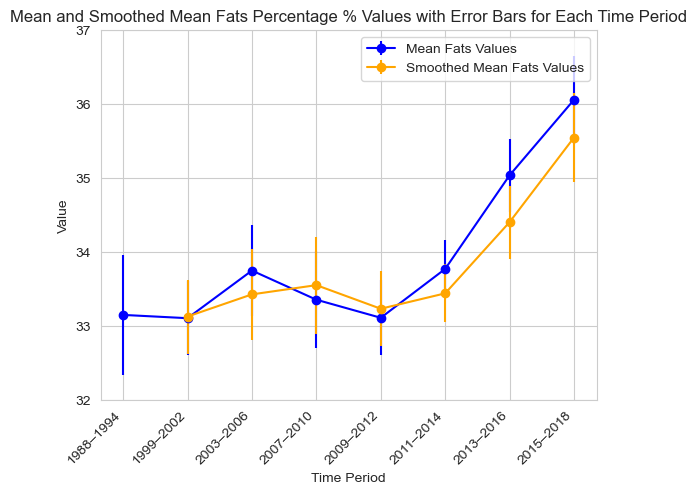

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


# Assuming you already have mean_values_fats calculated
mean_values_fats = df_fats.mean()

# Calculate standard deviation for error bars
std_dev_fats = df_fats.std()

# Apply a window function (rolling mean) with a window size of 3
smoothed_mean_values = mean_values_fats.rolling(window=2).mean()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the original mean values with error bars
ax.errorbar(mean_values_fats.index, mean_values_fats, yerr=std_dev_fats, marker='o', linestyle='-', label='Mean Fats Values', color='blue')

# Plot the smoothed mean values with error bars
ax.errorbar(mean_values_fats.index, smoothed_mean_values, yerr=std_dev_fats, marker='o', linestyle='-', label='Smoothed Mean Fats Values', color='orange')

# Customize the plot
ax.set_xlabel('Time Period')
ax.set_ylabel('Value')
ax.set_title('Mean and Smoothed Mean Fats Percentage % Values with Error Bars for Each Time Period')
ax.legend()
ax.grid(True)
ax.set_xticks(mean_values_fats.index)

# Corrected line for rotating x-axis labels
ax.set_xticklabels(mean_values_fats.index, rotation=45, ha='right')

plt.ylim(32, 37)

# Show the plot
plt.show()


In [15]:
#Seperate Saturated fats data
df_Saturatedfats = df.iloc[57:]
df_Saturatedfats
dtale.show(df_Saturatedfats)

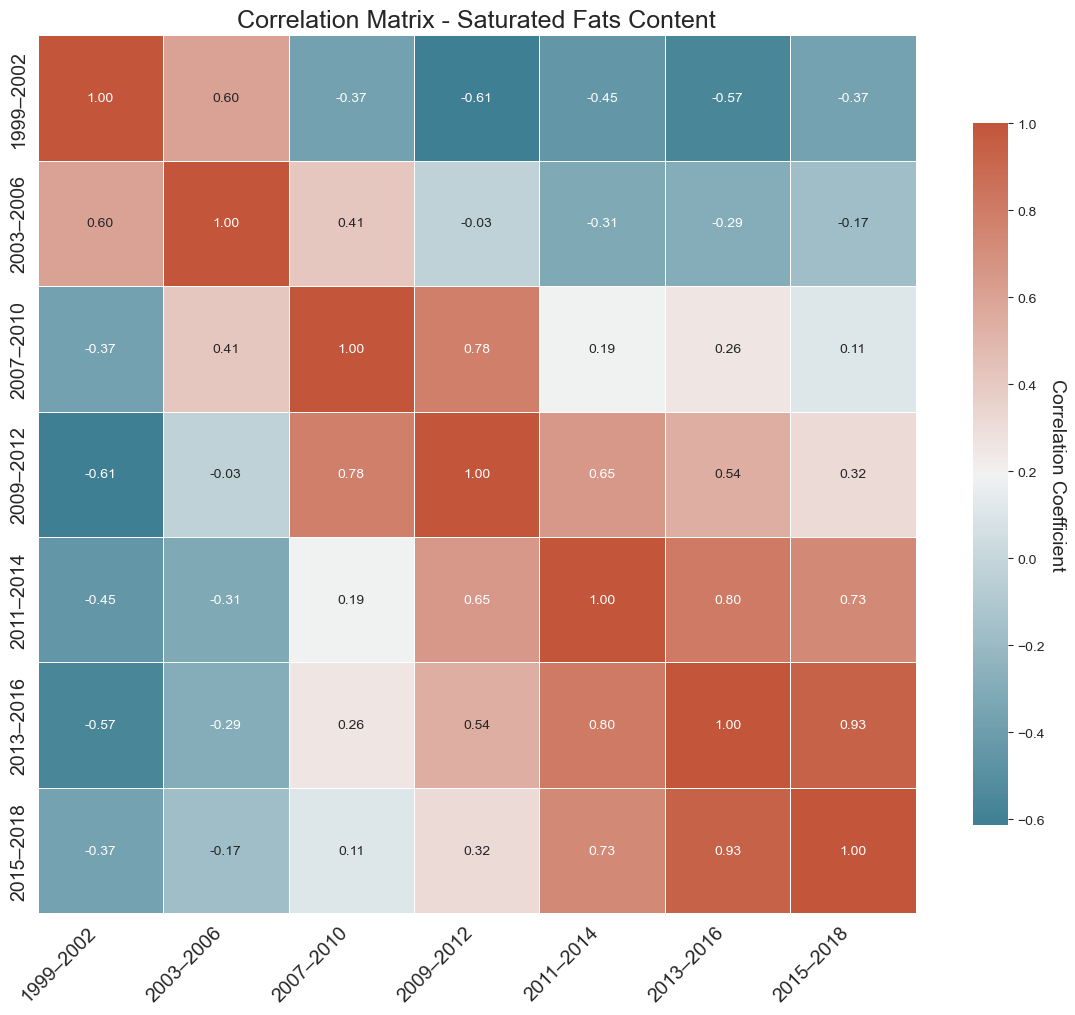

In [16]:
# Calculate the correlation matrix
correlation_matrix = df_Saturatedfats.corr()

# Set up a professional color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap using seaborn 
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.8})

# Customize the plot
plt.title('Correlation Matrix - Saturated Fats Content', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add color bar label
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15, fontsize=14)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

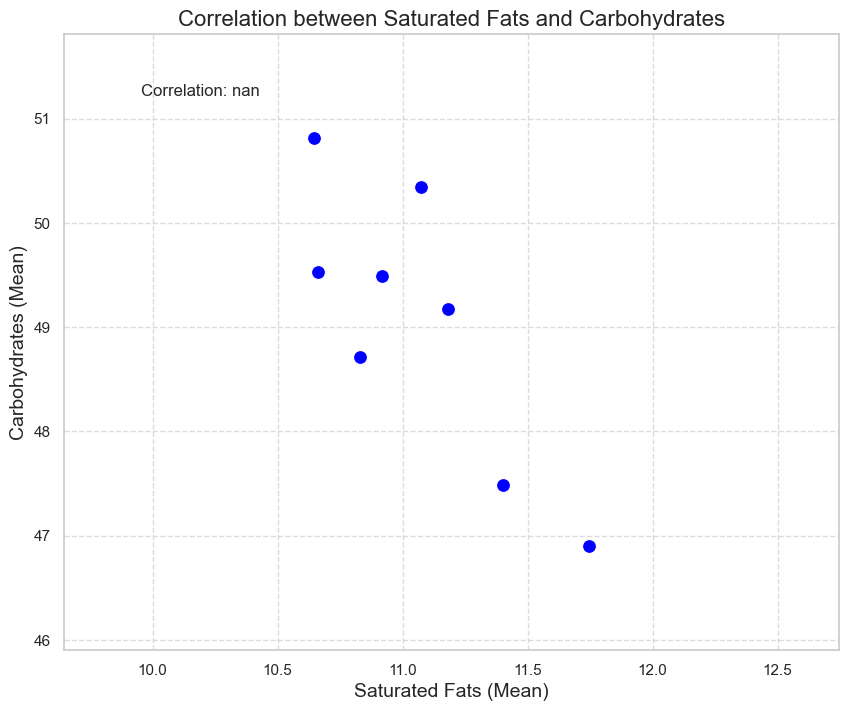

In [17]:
correlation_matrix = df_Saturatedfats.corrwith(df_carbohydrates)

# Create a professional scatter plot
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

# Plot the scatter plot
scatter = sns.scatterplot(x=df_Saturatedfats.mean(), y=df_carbohydrates.mean(), color='blue', s=100)

# Add correlation value as text
corr_value = correlation_matrix.mean()
plt.text(0.1, 0.9, f'Correlation: {corr_value:.2f}', transform=scatter.transAxes, fontsize=12)

# Add labels and title
plt.title('Correlation between Saturated Fats and Carbohydrates', fontsize=16)
plt.xlabel('Saturated Fats (Mean)', fontsize=14)
plt.ylabel('Carbohydrates (Mean)', fontsize=14)

# Set axis limits
plt.xlim(df_Saturatedfats.mean().min() - 1, df_Saturatedfats.mean().max() + 1)
plt.ylim(df_carbohydrates.mean().min() - 1, df_carbohydrates.mean().max() + 1)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()